# What are the most demanded skills for the top 3 most popular data roles?
#### Methodology
1. Import required libaries and dataset.
2. Clean the dataset.
3. Focus the analysis to job postings in India.
4. Clean the job skill column.
5. Group the skill count by skill and job_title.
6. Calculate the percentage representation of skills in respective data-related jobs.
7. Visualize the findings.

### Import Required Libraries for Analysis
This code imports libraries for data analysis and visualization. `pandas` handles structured data, `matplotlib` and `seaborn` create visualizations, and `ast` analyzes Python code structures. `datasets` likely accesses pre-built datasets for machine learning or analysis.

In [ ]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Import Dataset
This code loads a dataset from the `datasets` library (Hugging Face's). The `load_dataset` function fetches the `'lukebarousse/data_jobs'` dataset. The 'train' split of the dataset is then converted into a pandas DataFrame for easier data manipulation and analysis.

In [ ]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

### Data Cleanup
The `pd.to_datetime()` function is used to convert the `job_posted_date` column into a datetime format.

The `new_list` function checks if a value in `job_skills` is not null, and if so, uses `ast.literal_eval() `to safely evaluate the string as a Python literal (i.e., converting it from a string representation of a list to an actual list). This transformation is applied to the `job_skills` column using `.apply()`.

In [4]:
#Converted the datatype for job_posted_date from object to datetime 
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

#Coverted the datatype for skill_list from string to list
def new_list(skill_list):  
   if pd.notna(skill_list): 
      return ast.literal_eval(skill_list)  
df['job_skills'] = df.job_skills.apply(new_list)

### Filter df_India dataset for only job_country as India
This code filters the dataset `df` to create a new DataFrame, `df_India`, that contains only the rows where the `job_country` column is equal to `'India'`. It essentially extracts all job postings in the dataset that are associated with India.

In [5]:
df_India = df[df['job_country'] == 'India']

### Skills Count Group by Job Skills and Job Title
This code examines the distribution of skills across job titles in India by separating individual skills into rows, grouping them by job title and skill, and counting their occurrences. The results are sorted to identify the most frequently mentioned skills for each job title.

In [6]:
# Creates a copy of the India-specific dataset to ensure the original dataset remains unchanged.
df_India_skills = df_India.copy()  

# Splits the 'job_skills' column, which contains lists, into individual rows for more granular analysis.
df_India_skills = df_India_skills.explode('job_skills')  

# Groups the data by 'job_skills' and 'job_title_short' and calculates the count of each combination.
India_skills_count = df_India_skills.groupby(['job_skills', 'job_title_short']).size()  

# Converts the grouped data into a DataFrame and renames the calculated count column to 'skill_count'.
India_skills_count = India_skills_count.reset_index(name='skill_count')  

# Sorts the DataFrame in descending order of 'skill_count' to highlight the most frequent skills for each job title.
India_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)  

India_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


### Extracting and Sorting Top 3 Job Titles
This code extracts all unique job titles (`job_title_short`) from the `India_skills_count` DataFrame, converts them into a list, selects the first three titles, sorts them in ascending order, and returns the sorted list.

In [7]:
India_job_titles = India_skills_count['job_title_short'].unique().tolist() #In India_job_titles variable, set dataframe of skills_counts to return only the top 3 job_title_short
India_job_titles = sorted(India_job_titles[:3])
India_job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

### Plotting Top Skills for Top Job Titles in India
This code creates multiple bar charts, one for each of the top 3 job titles in India. It loops through the selected job titles, filters the top 5 skills for each, and plots them using `sns.barplot()`. Each plot displays the skill counts, with a different color palette for each skill. Finally, the plots are arranged in a vertical layout, and a title is added for the entire figure.

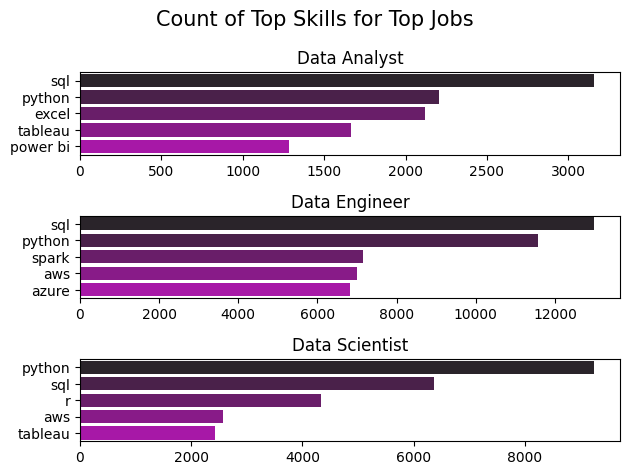

In [8]:
fig, ax = plt.subplots(len(India_job_titles), 1)  # Create a figure with multiple subplots (one for each job title).

for i, India_job_title in enumerate(India_job_titles): # Loop through each job title to generate a separate plot for each
  df_plot = India_skills_count[India_skills_count['job_title_short'] == India_job_title].head(5)   # Filter the top 5 skills for the current job title.
  sns.barplot (
    data=df_plot, 
    y='job_skills', 
    x='skill_count', 
    ax=ax[i], 
    hue='job_skills', 
    palette='dark:m' 
  ) 
  
  ax[i].set_title(India_job_title)
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')

fig.suptitle('Count of Top Skills for Top Jobs', size=15)
fig.tight_layout()

plt.show()

### Count of various Job Titles
This code calculates the number of occurrences of each job title in the `df_India` dataset. It uses `value_counts()` to count the frequency of each unique job title in the `job_title_short column`, converts the result into a DataFrame using `to_frame()`, and stores it in the `India_job_count` variable.

In [9]:
India_job_count = df_India['job_title_short'].value_counts().to_frame()
India_job_count

,count
job_title_short,
Data Engineer,19062
Data Scientist,13279
Data Analyst,6121
Senior Data Engineer,4353
Senior Data Scientist,2486
Business Analyst,1887
Software Engineer,1795
Senior Data Analyst,1083
Machine Learning Engineer,671


### Merging Skill Counts with Job Title Counts and Calculating Skill Percentage
This code merges two DataFrames: `India_skills_count` and `India_job_count`, linking them by the `job_title_short` column. The merge is done using a left join (`how='left'`), ensuring that all rows from `India_skills_count` are retained while corresponding job title counts from `India_job_count` are added. 

A new column, `percentage`, is then created, which calculates the percentage of each skill's count relative to the total job postings for that job title by dividing the `skill_count` by the total count and multiplying by 100.

In [10]:
India_skill_merge = pd.merge(India_skills_count, India_job_count, how='left', on='job_title_short')

#Create a coulmn that calculate the percentage of respective skill_count in job_title_short
India_skill_merge['percentage'] = (India_skill_merge['skill_count'] / India_skill_merge['count'])* 100
India_skill_merge

,job_skills,job_title_short,skill_count,count,percentage
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


### Visualizing Top Skills Percentage for Various Job Titles
This code generates a set of subplots to visualize the top 5 skills for each of the selected job titles. It first creates a figure with multiple subplots, one for each job title in `India_job_titles`. Within the loop, it filters the merged dataset, `India_skill_merge`, to extract the top 5 skills for each job title, and then plots the skill percentages using `sns.barplot`. Each bar is labeled with the exact percentage value, and the x-axis ticks are removed for all but the last subplot. The `set_xlim` function limits the x-axis to 75, and the overall figure title is set with `fig.suptitle`. Finally, `plt.tight_layout` adjusts the spacing between subplots for better visual clarity.

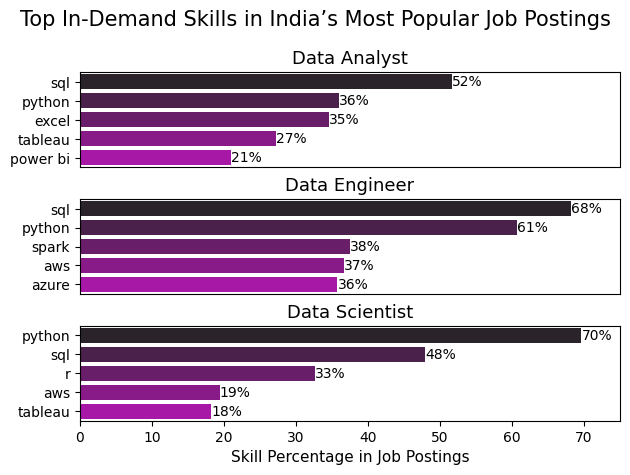

In [15]:
fig, ax = plt.subplots(len(India_job_titles), 1)  # Create a figure with multiple subplots (one for each job title)

for i, India_job_merge in enumerate(India_job_titles): # Loop through each India_job_title to generate a separate plot for each
   df_new_plot = India_skill_merge[India_skill_merge['job_title_short'] == India_job_merge].head(5)   # Filter the top 5 skills for the current job title.
   sns.barplot (
    data=df_new_plot, 
    y='job_skills', 
    x='percentage', 
    ax=ax[i], 
    hue='job_skills', 
    palette='dark:m' 
   ) 
   
   if i !=len(India_job_titles) -1:
      ax[i].set_xticks([])
     

   for n, v in enumerate(df_new_plot['percentage']):
      ax[i].text(v, n, f'{v:.0f}%', va='center')   

   ax[i].set_title(India_job_merge, size=13)
   ax[i].set_ylabel('')
   ax[i].set_xlabel('') 
   ax[i].set_xlim(0,75)            

ax[-1].set_xlabel('Skill Percentage in Job Postings', size=11)

fig.suptitle('Top In-Demand Skills in India’s Most Popular Job Postings', size=15)
plt.tight_layout(h_pad=.7)